In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [47]:
digits = load_digits() # دیتاست digits (اعداد دست‌نویس 0 تا 9)

x = digits.data      # 64 features = 8x8  flatten the data (64, 1797)
y = digits.target   # برچسب (0 تا 9)
#classification 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state=42,
                                                    stratify = y)
#stratify = y  مشابه میماند test,train و توزیع برچسب‌ها (کلاس‌ها) در 


In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
#  (برچسب دسته‌بندی)  در اینجا کلاس های عددی است نه داده پیوسته لازم نیست روی تارگت هم استاندارد سازی بزنیمy چون 

In [65]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), #2 hidden layer 64 and 32 neuron
                    activation='relu',
                    solver='adam',  #Optimization Algorithm
                    max_iter=500, early_stopping=True , #max iteration number
                    random_state=40)

mlp.fit(x_train_scaled, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=500,
              random_state=40)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.88      0.97      0.92        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.92      1.00      0.96        36
           5       1.00      1.00      1.00        37
           6       1.00      0.94      0.97        36
           7       0.97      1.00      0.99        36
           8       0.97      0.86      0.91        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



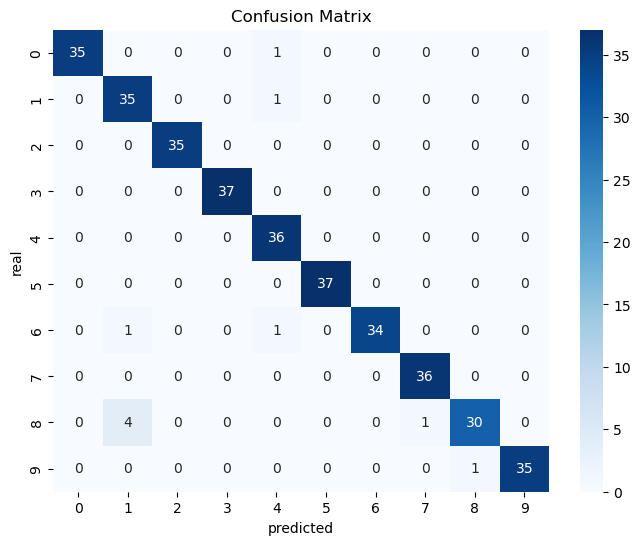

In [81]:
y_pred = mlp.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') #heatmap of matrix, annot will show numbers in cells,
#fmt is 'd' means a digit format of numbers in cells
plt.xlabel("predicted")
plt.ylabel("real")
plt.title("Confusion Matrix")
plt.show()

 #  یکی از مهم‌ترین ابزارهای تحلیل مدل‌های طبقه بندی است و یه جدول سادس که نشون میده چقدر مدل درست یا غلط پیش بینی کرده"confusion matrix" 

### Regression and MLP


In [122]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer as SI
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("california_housing.csv")

print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [124]:
X = df.drop("median_house_value", axis = 1) #excluding target feature from data 
y = df["median_house_value"]                #y is a target feature

In [126]:
print(X.info()) #searching for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB
None


In [132]:
#filling missing values with median 

total_bedrooms_median =  X["total_bedrooms"].median()
X["total_bedrooms"] =   X["total_bedrooms"].fillna(total_bedrooms_median)

X.info()
#y = y.loc[X.index] #in case if we had a missing value in target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [170]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state= 40)

In [138]:
x_train_categorical = x_train[['ocean_proximity']]
x_test_categorical = x_test[['ocean_proximity']]
x_train_numeric = x_train.select_dtypes(include= [np.number])
x_test_numeric = x_test.select_dtypes(include= [np.number])


#for categorical data
ohe = OneHotEncoder()
ocean_proximity_ohe = ohe.fit_transform(x_train_categorical)
x_train_categorical_ohe = pd.DataFrame(ocean_proximity_ohe.toarray(),
                                              columns=ohe.get_feature_names_out())

ocean_proximity_ohe2 = ohe.fit_transform(x_test_categorical)
x_train_categorical_ohe2 = pd.DataFrame(ocean_proximity_ohe2.toarray(),
                                              columns=ohe.get_feature_names_out())

In [140]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_numeric)
x_test_scaled = scaler.transform(x_test_numeric)

In [142]:
from sklearn.neural_network import MLPRegressor

In [219]:
#mlp = MLPRegressor(hidden_layer_sizes= (100,50),
mlp = MLPRegressor(hidden_layer_sizes= (128,64,32,16),
                   activation="relu",
                   solver= "adam",
                   max_iter= 1000, early_stopping=True, validation_fraction=0.1,
                   random_state = 40)

mlp.fit(x_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(128, 64, 32, 16),
             max_iter=1000, random_state=40)

In [186]:
from sklearn.metrics import mean_squared_error, r2_score

In [221]:
y_pred = mlp.predict(x_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 2947722879.847448
R2 Score: 0.7864802093959904


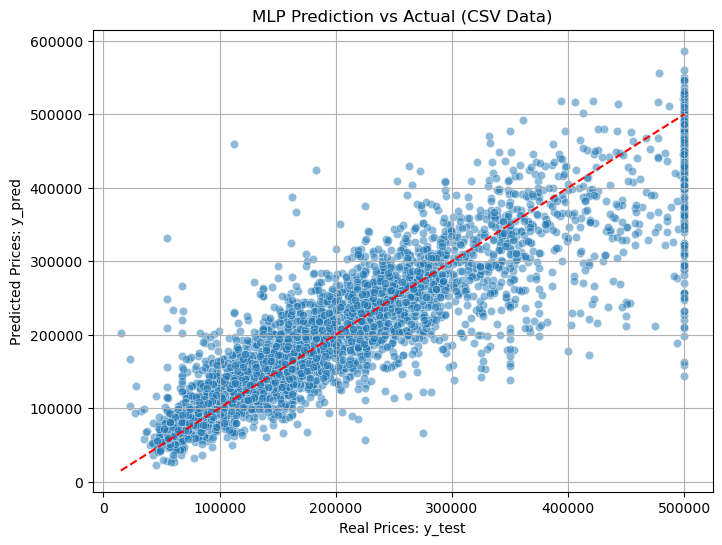

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Real Prices: y_test")
plt.ylabel("Predicted Prices: y_pred")
plt.title("MLP Prediction vs Actual (CSV Data)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()


In [211]:
# from sklearn.metrics import r2_score

# for act in ['identity', 'logistic', 'tanh', 'relu']:
#     model = MLPRegressor(hidden_layer_sizes=(100,), activation=act, max_iter=500, random_state=40)
#     model.fit(x_train_scaled, y_train)
#     preds = model.predict(x_test_scaled)
#     score = r2_score(y_test, preds)
#     print(f"Activation: {act} | R2 Score: {score:.3f}")


In [213]:
# for layers in [(100,), (128,64), (128,64,32)]:
#     model = MLPRegressor(hidden_layer_sizes=layers, max_iter=500, activation='relu', random_state=40)
#     model.fit(x_train_scaled, y_train)
#     y_pred = model.predict(x_test_scaled)
#     score = r2_score(y_test, y_pred)
#     print(f"Layers: {layers} | R² Score: {score:.3f}")
